<a href="https://colab.research.google.com/github/RyanXHF/ml_diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/RyanXHF/ml_diabetes/main/diabetes.csv'  # Updated URL to access raw content
db = pd.read_csv(url)
db

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,167.000,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,248.000,1
3,70,45,543,30.5,158.000,1
4,60,23,846,30.1,398.000,1
...,...,...,...,...,...,...
389,88,44,510,43.3,222.000,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,766.000,0
392,76,48,180,32.9,171.000,0


In [2]:
# separar features(X) e classes
x = db.drop('diabetes', axis = 1)
y = db['diabetes']

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [3]:
from sklearn.model_selection import train_test_split

seed = 5
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = seed)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criando os modelo
DTC = DecisionTreeClassifier(max_depth=5, random_state=seed)

# Treinando os modelo
DTC.fit(x_treino, y_treino)

# Fazendo previsões
DTC_pred_treino = DTC.predict(x_treino)
DTC_pred_teste = DTC.predict(x_teste)

# Calculando a acurácia
DTC_acur_treino = accuracy_score(y_treino, DTC_pred_treino)
DTC_acur_teste = accuracy_score(y_teste, DTC_pred_teste)

# Prints
print(f'Acurácia DecisionTreeClassifer - Treino: {DTC_acur_treino:.4f}')
print(f'Acurácia DecisionTreeClassifer - Teste: {DTC_acur_teste:.4f}')

Acurácia DecisionTreeClassifer - Treino: 0.8441
Acurácia DecisionTreeClassifer - Teste: 0.6566


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criando os modelo
RFC = RandomForestClassifier(max_depth=5, random_state=seed)

# Treinando os modelo
RFC.fit(x_treino, y_treino)

# Fazendo previsões
RFC_pred_treino = RFC.predict(x_treino)
RFC_pred_teste = RFC.predict(x_teste)

# Calculando a acurácia
RFC_acur_treino = accuracy_score(y_treino, RFC_pred_treino)
RFC_acur_teste = accuracy_score(y_teste, RFC_pred_teste)

# Prints
print(f'Acurácia RandomForestClassifer - Treino: {RFC_acur_treino:.4f}')
print(f'Acurácia RandomForestClassifer - Teste: {RFC_acur_teste:.4f}')

Acurácia RandomForestClassifer - Treino: 0.8847
Acurácia RandomForestClassifer - Teste: 0.6566


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

Matrix de confusão: 



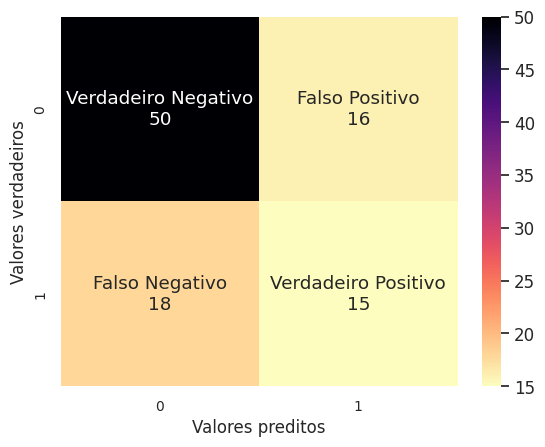

In [9]:
# matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'12'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)


categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

mc_dtc = confusion_matrix(y_teste, DTC_pred_teste)
print('Matrix de confusão: \n')
gerando_matriz(mc_dtc, labels, categorias, cmap="magma_r")

Matrix de confusão: 



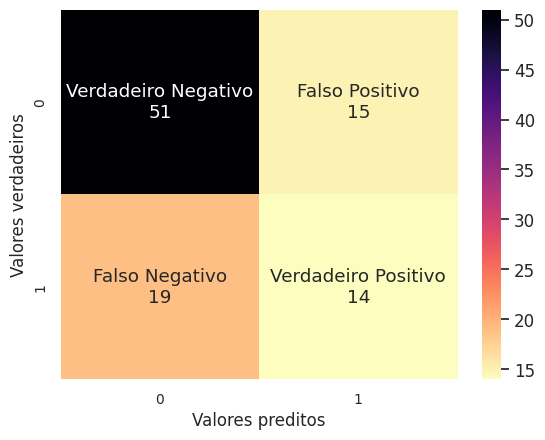

In [10]:
mc_rfc = confusion_matrix(y_teste, RFC_pred_teste)

print('Matrix de confusão: \n')
gerando_matriz(mc_rfc, labels, categorias, cmap="magma_r")

### Desafio 5

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados

In [11]:
# metricas - DTC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Acuracia do modelo: ", accuracy_score(y_teste, DTC_pred_teste))
print("Precisão do modelo: ", precision_score(y_teste, DTC_pred_teste))
print("Recall do modelo: ", recall_score(y_teste, DTC_pred_teste))
print("F1 do modelo: ", f1_score(y_teste, DTC_pred_teste))

Acuracia do modelo:  0.6565656565656566
Precisão do modelo:  0.4838709677419355
Recall do modelo:  0.45454545454545453
F1 do modelo:  0.46874999999999994


In [12]:
# metricas - RFC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Acuracia do modelo: ", accuracy_score(y_teste, RFC_pred_teste))
print("Precisão do modelo: ", precision_score(y_teste, RFC_pred_teste))
print("Recall do modelo: ", recall_score(y_teste, RFC_pred_teste))
print("F1 do modelo: ", f1_score(y_teste, RFC_pred_teste))

Acuracia do modelo:  0.6565656565656566
Precisão do modelo:  0.4827586206896552
Recall do modelo:  0.42424242424242425
F1 do modelo:  0.45161290322580644


### Desafio 6

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

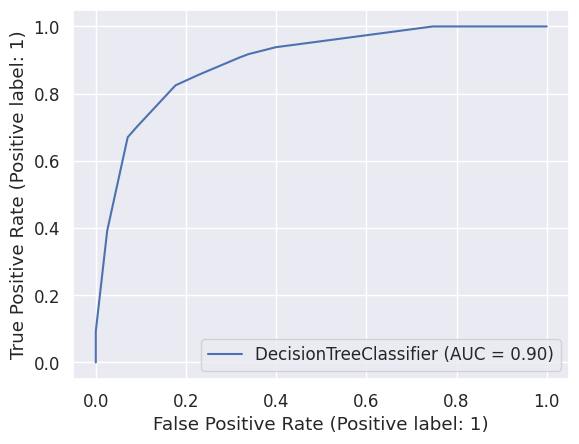

In [13]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(DTC, x_treino, y_treino)
plt.show()

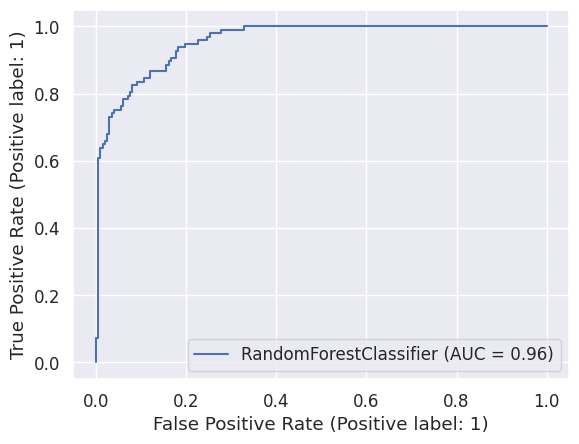

In [14]:
RocCurveDisplay.from_estimator(RFC, x_treino, y_treino)
plt.show()

### Desafio 7

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

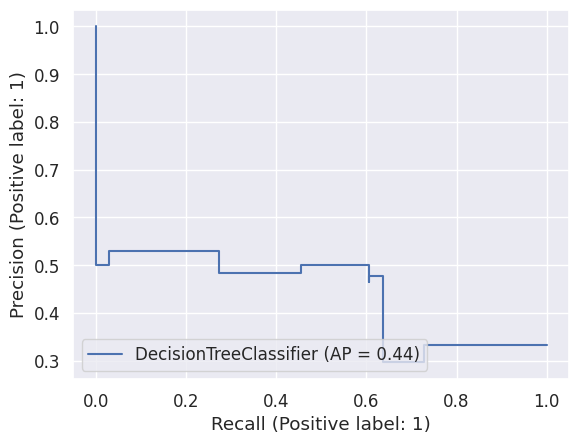

In [16]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(DTC, x_teste, y_teste)

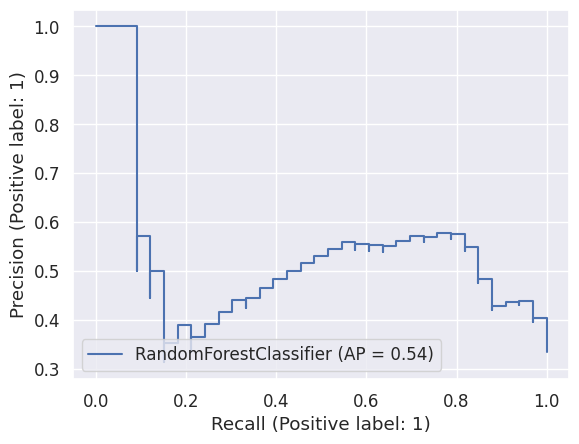

In [17]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(RFC, x_teste, y_teste)

### Desafio 8

Gere os relatórios de métricas dos modelos de classificação gerados.

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, DTC_pred_teste))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        66
           1       0.48      0.45      0.47        33

    accuracy                           0.66        99
   macro avg       0.61      0.61      0.61        99
weighted avg       0.65      0.66      0.65        99



In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, RFC_pred_teste))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        66
           1       0.48      0.42      0.45        33

    accuracy                           0.66        99
   macro avg       0.61      0.60      0.60        99
weighted avg       0.65      0.66      0.65        99



### Desafio 9

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



### Desafio 10

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

### Desafio 11

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

### Desafio 12

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


### Desafio 13

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

### Desafio 14

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 15

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 16

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.